<a href="https://colab.research.google.com/github/avelin0/Operational-Research/blob/main/rede_de_transporte_aereo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q amplpy
from amplpy import tools
ampl = tools.ampl_notebook(
    modules=["highs", "coin"], # pick from over 20 modules including most commercial and open-source solvers
    license_uuid="a7b5f725-8923-4d76-9653-0b4622ecab83") # your license UUID

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.0 MB/s eta 0:00:00
Licensed to AMPL Community Edition License for <avel.bruno@gmail.com>.


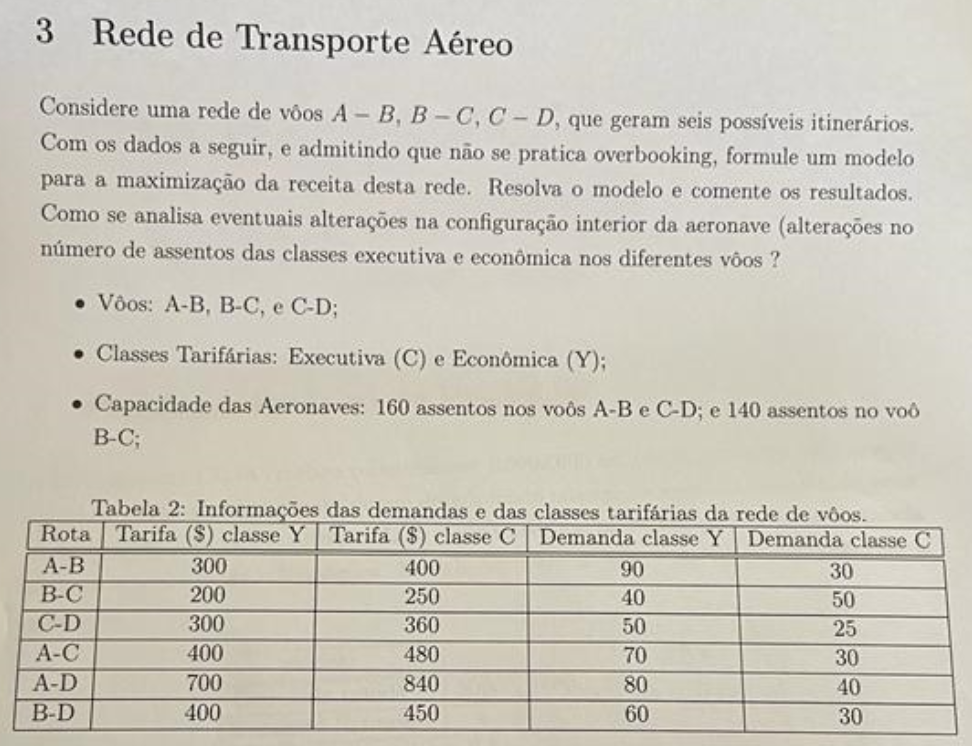

In [2]:
%%ampl_eval
set rotas = {"ABy","ABc","BCy","BCc","CDy","CDc","ACy","ACc","ADy","ADc","BDy","BDc"};

var x{i in rotas} >= 0;

maximize Profit: 
    300 * x["ABy"] + 400 * x["ABc"] + 
    200 * x["BCy"] + 250 * x["BCc"] +
    300 * x["CDy"] + 360 * x["CDc"] + 
    400 * x["ACy"] + 480 * x["ACc"] +
    700 * x["ADy"] + 840 * x["ADc"] + 
    400 * x["BDy"] + 450 * x["BDc"];

s.t. R1: x["ABy"] <= 90; s.t. R2: x["ABc"] <= 30;
s.t. R3: x["BCy"] <= 40; s.t. R4: x["BCc"] <= 50;
s.t. R5: x["CDy"] <= 50; s.t. R6: x["CDc"] <= 25;
s.t. R7: x["ACy"] <= 70; s.t. R8: x["ACc"] <= 30;
s.t. R9: x["ADy"] <= 80; s.t. R10:x["ADc"] <= 40;
s.t. R11:x["BDy"] <= 60; s.t. R12:x["BDc"] <= 30;

s.t. R13: x["ABy"] + x["ABc"] +                                 x["ACy"] + x["ACc"] + x["ADy"] + x["ADc"]                          <= 160;
s.t. R14:               x["BCy"] + x["BCc"] +                   x["ACy"] + x["ACc"] + x["ADy"] + x["ADc"] + x["BDy"] + x["BDc"]    <= 140;
s.t. R15:                               x["CDy"] + x["CDc"] +                         x["ADy"] + x["ADc"] + x["BDy"] + x["BDc"]    <= 160;

In [7]:
%%ampl_eval
option solver cbc;
solve;
display x;
display Profit;

cbc 2.10.7: cbc 2.10.7: optimal solution; objective 129600
0 simplex iterations
x [*] :=
ABc  30
ABy  75
ACc   0
ACy   0
ADc  40
ADy  15
BCc  50
BCy   5
BDc  30
BDy   0
CDc  25
CDy  50
;

Profit = 129600

